In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

In [2]:
def random_matrix(shape):
    A = np.random.rand(shape[0], shape[1])*50
    return A

def random_integer_matrix(shape):
    return np.floor(random_matrix(shape))

(350, 350)
125.016227649 120.910921562


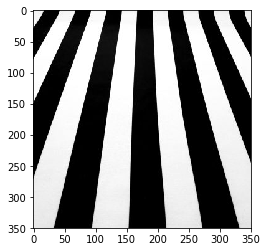

In [3]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

X = random_integer_matrix((5,15))
# print(X)

im = Image.open("image/image5.jpg")
data_orig = rgb2gray(np.array(im))
print(data_orig.shape)
print(np.mean(data_orig), np.std(data_orig))
plt.imshow(data_orig, cmap='gray')
plt.show()

In [4]:
# Hyperparamters
X = data_orig

W = X.shape[0]
K = X.shape[1]
shape = (W, K)
I = 200
T_shape = (W, I)
V_shape = (I, K)

In [5]:
# SADA Sampler
print(np.mean(X), np.std(X))

# Initialization

# mean = gamma_scale * gamma_shape
# variance = gamma_scale * gamma_shape^2

data_variance = (np.std(X)/(I/5))**2
data_mean = np.mean(X)/I*1.3
print(data_mean, data_variance)

gamma_scale = data_variance/data_mean # b/sqrt(a) == std
gamma_shape = data_mean/gamma_scale
print(gamma_scale, gamma_shape)

A_t = np.ones(T_shape)*gamma_shape
B_t = np.ones(T_shape)*gamma_scale
A_v = np.ones(V_shape)*gamma_shape
B_v = np.ones(V_shape)*gamma_scale

T = np.random.gamma(A_t,B_t)
V = np.random.gamma(A_v,B_v)
print(np.mean(np.dot(T,V)), np.std(np.dot(T,V)))

mean_diff = np.mean(np.abs(X - np.dot(T,V)))
print("Random loss: ", mean_diff)

125.016227649 120.910921562
0.812605479718 9.13715684554
11.2442717574 0.0722683956105
134.84156788 139.95900722
Random loss:  141.297124169


In [6]:
# Loop
max_iter = 100
for n in range(max_iter):
    
    p = np.zeros((W, I ,K))
    S = np.zeros((W, I ,K))
    
    for v in range(W):
        for t in range(K):
#             print(T.shape, V.shape, p.shape, t,v)
            p[v, :, t] = ((T[[v],:]*V[:, [t]].T)/ T[[v],:].dot(V[:, [t]]))
            S[v, :, t] = np.random.binomial(X[v,t], p[v, :, t].squeeze())
    
    sigma_t = np.sum(S, axis=2)
    sigma_v = np.sum(S, axis=0)
    
#     print(T.shape, V.shape, W, K)
    
    alpha_t = A_t + sigma_t
    beta_t = 1./(A_t/B_t + np.ones((W,1)).dot(V.dot(np.ones((K,1))).T))
    
    alpha_v = A_v + sigma_v
    beta_v = 1./(A_v/B_v + np.dot(np.ones((W,1)).T.dot(T).T, np.ones((K,1)).T))

    T = np.random.gamma(alpha_t, beta_t)
    V = np.random.gamma(alpha_v, beta_v)
    
    if n % 1 == 0:
        mean_diff = np.mean(np.abs(X - np.dot(T,V)))
        print("epoch %d: loss: "%n, mean_diff)

epoch 0: loss:  101.132065825
epoch 1: loss:  96.2630629565
epoch 2: loss:  91.1545058328
epoch 3: loss:  86.1186435663
epoch 4: loss:  80.4705847668
epoch 5: loss:  73.6808941735
epoch 6: loss:  67.6750143106
epoch 7: loss:  62.1824893647
epoch 8: loss:  57.1015697231
epoch 9: loss:  53.9966567238
epoch 10: loss:  49.8302194497
epoch 11: loss:  48.442540879
epoch 12: loss:  44.8287443342
epoch 13: loss:  44.333720979
epoch 14: loss:  41.1218419342
epoch 15: loss:  41.1951202651
epoch 16: loss:  38.2511245272
epoch 17: loss:  38.7440518272
epoch 18: loss:  35.9306556103
epoch 19: loss:  36.669698926
epoch 20: loss:  33.9795193592
epoch 21: loss:  34.878706904
epoch 22: loss:  32.3101957362
epoch 23: loss:  33.4019698996
epoch 24: loss:  30.9025325383
epoch 25: loss:  32.018926553
epoch 26: loss:  29.6615035545
epoch 27: loss:  30.8635447367
epoch 28: loss:  28.5507552575
epoch 29: loss:  29.7910043131
epoch 30: loss:  27.5766321429
epoch 31: loss:  28.895792071
epoch 32: loss:  26.7091

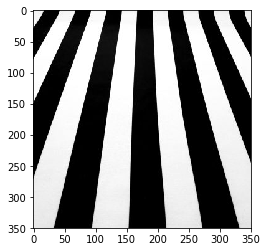

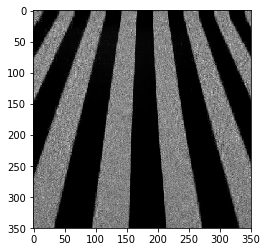

In [7]:
# print(X)
# print(np.dot(T,V))

plt.imshow(X, cmap='gray')
plt.show()
plt.imshow(np.dot(T,V), cmap='gray')
plt.show()

In [8]:
print(np.mean(X), np.std(X))
print(np.mean(np.dot(T,V)), np.std(np.dot(T,V)))

125.016227649 120.910921562
131.549846034 128.534607493
